In [56]:
from __future__ import division
import csv
import glob
from datetime import datetime
from collections import Counter, defaultdict
from itertools import groupby
from pprint import pprint
import pandas as pd

# Challenge 1:

In [3]:
def load_data(filename):
    with open(filename,'rb') as f:
        reader = csv.reader(f)
        rows = [[cell.strip() for cell in row] for row in reader]
    
    assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']
    
    raw_readings = {}
    for row in rows:
        raw_readings.setdefault(tuple(row[:4]), []).append(row[4:])
    return raw_readings

raw_readings = load_data('turnstile_150328.txt')

In [4]:
raw_readings.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [['NR',
   'BMT',
   '03/21/2015',
   '00:00:00',
   'REGULAR',
   '0005752280',
   '0003213654'],
  ['NR',
   'BMT',
   '03/21/2015',
   '04:00:00',
   'REGULAR',
   '0005752343',
   '0003213668'],
  ['NR',
   'BMT',
   '03/21/2015',
   '08:00:00',
   'REGULAR',
   '0005752368',
   '0003213695'],
  ['NR',
   'BMT',
   '03/21/2015',
   '12:00:00',
   'REGULAR',
   '0005752499',
   '0003213886'],
  ['NR',
   'BMT',
   '03/21/2015',
   '16:00:00',
   'REGULAR',
   '0005752799',
   '0003214145'],
  ['NR',
   'BMT',
   '03/21/2015',
   '20:00:00',
   'REGULAR',
   '0005753219',
   '0003214379'],
  ['NR',
   'BMT',
   '03/22/2015',
   '00:00:00',
   'REGULAR',
   '0005753428',
   '0003214457'],
  ['NR',
   'BMT',
   '03/22/2015',
   '04:00:00',
   'REGULAR',
   '0005753507',
   '0003214478'],
  ['NR',
   'BMT',
   '03/22/2015',
   '08:00:00',
   'REGULAR',
   '0005753526',
   '0003214496'],
  ['NR',
   'BMT',
   '03/22/2015',
   '12:00:00',
   

# Challenge 2:

In [45]:
def cumulative_datetime(raw_readings):
    datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()}
    return datetime_cumulative

datetime_cumulative = cumulative_datetime(raw_readings)

In [48]:
def datetime_times_count(datetime_cumulative):
    datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}
    return datetime_count_times

datetime_count_times = datetime_times_count(datetime_cumulative)

In [7]:
all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2453, 2463, 2464, 2464, 2466, 2467, 2467, 2493, 2497, 2499, 2500, 2524, 2526, 2532, 2539, 2542, 2556, 2571, 2573, 2581, 2596, 2620, 2621, 2625, 2628, 2637, 2638, 2644, 2649, 2651, 2654, 2665, 2728, 2785, 2841, 2916, 2920, 2926, 2940, 2945, 2995, 3084, 3385, 4957, 10230, 13596, 83814175, 169801557, 367655512, 436524900]


In [8]:
print all_counts[:1200]

[-752058474, -7586280, -5983249, -1425128, -1262354, -268006, -257818, -192465, -53485, -21966, -1944, -1763, -1709, -1691, -1686, -1686, -1684, -1674, -1665, -1657, -1647, -1643, -1641, -1641, -1635, -1632, -1626, -1620, -1613, -1594, -1593, -1590, -1565, -1549, -1545, -1528, -1497, -1480, -1480, -1468, -1466, -1417, -1417, -1401, -1398, -1398, -1389, -1378, -1375, -1373, -1360, -1360, -1348, -1333, -1327, -1320, -1317, -1311, -1306, -1301, -1299, -1294, -1292, -1289, -1285, -1264, -1250, -1240, -1230, -1229, -1219, -1217, -1211, -1189, -1185, -1171, -1165, -1159, -1156, -1154, -1145, -1137, -1134, -1132, -1131, -1120, -1118, -1113, -1108, -1103, -1102, -1102, -1100, -1094, -1093, -1092, -1086, -1084, -1080, -1073, -1063, -1052, -1042, -1042, -1037, -1037, -1034, -1018, -1016, -1015, -1006, -1004, -997, -977, -976, -975, -967, -959, -953, -953, -947, -947, -940, -934, -926, -924, -920, -918, -908, -907, -906, -904, -901, -901, -900, -896, -892, -887, -886, -885, -883, -881, -880, -879

In [9]:
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 172715), (4.2, 10551), (8.0, 210), (4.433333333333334, 150), (0.022500000000000003, 60), (0.02222222222222222, 59), (0.02388888888888889, 21), (2.230277777777778, 21), (1.5166666666666666, 21), (0.025833333333333333, 21)]


In [10]:
def datetime_count(datetime_count_times):
    datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}
    return datetime_counts

datetime_counts = datetime_count(datetime_count_times)

# Challenge 3:

In [12]:
def daily_counts(datetime_counts):
    day_counts = {}
    for key, value in datetime_counts.items():
        d = {}
        for time, count in value:
            day = time.date()
            d[day] = d.get(day, 0) + count
        day_counts[key] = sorted(d.items())
    return day_counts

day_counts = daily_counts(datetime_counts)

# Challenge 4:

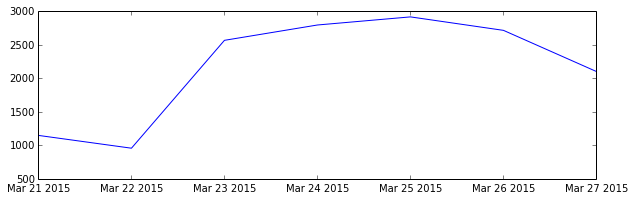

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

turnstile = day_counts.values()[0]
dates = []
counts = []

for time, count in turnstile:
    dates.append(time)
    counts.append(count)

plt.figure(figsize=(10,3))
plt.plot(dates,counts)


# Challenge 5:

In [14]:
def booth_of_a_turnstile(turnstile):
    control_area, unit, device_id, station = turnstile
    return (control_area, unit, station)
def booth_of_a_timeseries(item):
    turnstile, time_series = item
    return booth_of_a_turnstile(turnstile)

def booth_time_series(day_counts):
    turnstile_items = sorted(day_counts.items())
    booth_to_time_series = {}
    for booth, item_list_of_booth in groupby(turnstile_items, key=booth_of_a_timeseries):
        for turnstile, time_series in item_list_of_booth:
            daily_counter = Counter()
            for date, count in time_series:
                if count is not None:
                    daily_counter[date] += count
                
            if booth not in booth_to_time_series.keys():
                booth_to_time_series[booth] = daily_counter
            else:
                booth_to_time_series[booth] += daily_counter
            
        booth_to_time_series[booth] = sorted(booth_to_time_series[booth].items())
        
    return booth_to_time_series

booth_to_time_series = booth_time_series(day_counts)

# Challenge 6:

In [15]:
def station_of_a_booth(booth):
    control_area, unit, station = booth
    return station
def station_of_a_timeseries(item):
    booth, time_series = item
    return station_of_a_booth(booth)

def station_time_series(booth_to_time_series):
    booth_items = sorted(booth_to_time_series.items())
    station_to_time_series = {}
    for station, item_list_of_station in groupby(booth_items, key=station_of_a_timeseries):
        for booth, time_series in item_list_of_station:
            station_counter = Counter()
            for date, count in time_series:
                if count is not None:
                    station_counter[date] += count
                
            if station not in station_to_time_series.keys():
                station_to_time_series[station] = station_counter
            else:
                station_to_time_series[station] += station_counter
            
    for s, item_list in station_to_time_series.iteritems():
        station_to_time_series[s] = sorted(item_list.items())
        
    return station_to_time_series

station_to_time_series = station_time_series(booth_to_time_series)

# Challenge 7:

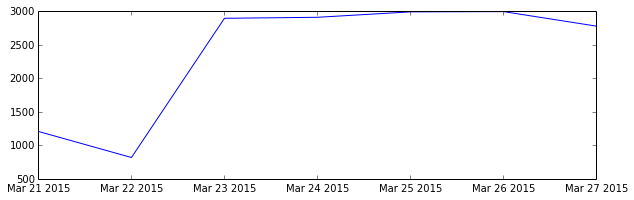

In [16]:
station = station_to_time_series.values()[0]
dates = []
counts = []

for time, count in station:
    dates.append(time)
    counts.append(count)

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

# Challenge 8:

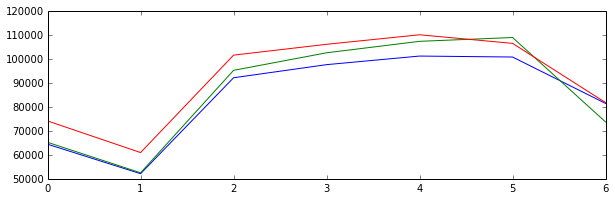

In [52]:
def process_data(filename):
    raw_readings = load_data(filename)
    datetime_cumulative = cumulative_datetime(raw_readings)
    datetime_count_times = datetime_times_count(datetime_cumulative)
    datetime_counts = datetime_count(datetime_count_times)
    day_counts = daily_counts(datetime_counts)
    booth_to_time_series = booth_time_series(day_counts)
    station_to_time_series = station_time_series(booth_to_time_series)
    
    return station_to_time_series

def station_week_count(station_to_time_series):
    tsq = station_to_time_series['42 ST-TIMES SQ']
    counts = []

    for _, count in tsq:
        counts.append(count)
    return counts

week_404 = process_data('turnstile_150404.txt')
week_411 = process_data('turnstile_150411.txt')

week_328_counts = station_week_count(station_to_time_series)
week_404_counts = station_week_count(week_404)
week_411_counts = station_week_count(week_411)

plt.figure(figsize=(10,3))
plt.plot(week_328_counts)
plt.plot(week_404_counts)
plt.plot(week_411_counts)

    

# Challenge 9:

In [58]:
dicts = [station_to_time_series, week_404, week_411]
weeks = defaultdict(list)

for k, v in ((k, v) for d in dicts for k, v in d.iteritems()):
    weeks[k].append(v)

weeks

defaultdict(list,
            {'1 AVE': [[(datetime.date(2015, 3, 21), 19251),
               (datetime.date(2015, 3, 22), 15571),
               (datetime.date(2015, 3, 23), 23625),
               (datetime.date(2015, 3, 24), 23873),
               (datetime.date(2015, 3, 25), 24204),
               (datetime.date(2015, 3, 26), 24915),
               (datetime.date(2015, 3, 27), 21372)],
              [(datetime.date(2015, 3, 28), 20389),
               (datetime.date(2015, 3, 29), 16453),
               (datetime.date(2015, 3, 30), 23895),
               (datetime.date(2015, 3, 31), 24450),
               (datetime.date(2015, 4, 1), 25186),
               (datetime.date(2015, 4, 2), 25324),
               (datetime.date(2015, 4, 3), 17358)],
              [(datetime.date(2015, 4, 4), 18472),
               (datetime.date(2015, 4, 5), 13686),
               (datetime.date(2015, 4, 6), 20839),
               (datetime.date(2015, 4, 7), 21583),
               (datetime.date(2015, 4, 8),

In [68]:
def week_counts(weeks):
    weekly_counts = {}
    for key, value in weeks.items():
        for week in value:
                weekly_counts[key] = weekly_counts.get(key, 0) + sum(j for _,j in week)
    return weekly_counts

weekly_ridership = week_counts(weeks)



# Challenge 10:

(array([ 297.,   49.,   18.,    5.,    5.,    2.,    3.,    0.,    1.,    1.]),
 array([    4471. ,   326460.4,   648449.8,   970439.2,  1292428.6,
         1614418. ,  1936407.4,  2258396.8,  2580386.2,  2902375.6,
         3224365. ]),
 <a list of 10 Patch objects>)

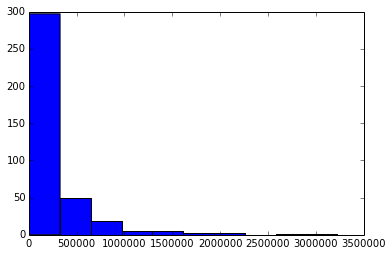

In [69]:
total_ridership_counts = weekly_ridership.values()
plt.hist(total_ridership_counts)
